# EDA OF CAR INFORMATION DATASETS

In [96]:
##  IMPORTS LIBRARIES

import pandas as pd          # for data handling
import numpy as np           # for numerical work
import matplotlib.pyplot as plt   # for charts
import seaborn as sns             # for beautiful charts
from ipywidgets import interact, interactive, widgets, fixed
from IPython.display import display, Markdown

# Load dataset
df = pd.read_csv(r"C:\Users\abidh\OneDrive\Desktop\datasets\Automobile.csv")

###   Quick Dataset Snapshot

In [97]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


###  Dataset Overview
#BasicInfo #StartHere

In [98]:
def dataset_overview():
    display(Markdown("### 📊 Dataset Overview"))
    
    print("Total Rows:", df.shape[0])
    print("Total Columns:", df.shape[1])

    print("\nColumns in dataset:")
    print(list(df.columns))

    display(Markdown("""
### 👍 What this means
- You now know how big the dataset is
- You understand what information it has
- This gives a simple and clear start
"""))

dataset_overview()

### 📊 Dataset Overview

Total Rows: 398
Total Columns: 9

Columns in dataset:
['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']



### 👍 What this means
- You now know how big the dataset is
- You understand what information it has
- This gives a simple and clear start


###  Data Quality Check
#MissingData #Duplicates #DataTypes

In [99]:
def show_quality():
    display(Markdown("### 🛠 Data Types"))
    print(df.dtypes)

    display(Markdown("### ❓ Missing Values"))
    print(df.isnull().sum())

    display(Markdown("### 🔁 Duplicate Rows"))
    print(df.duplicated().sum())

    display(Markdown("""
### 👍 What this tells us
- Data types show what kind of values we have
- Missing values tell if cleaning is needed
- Duplicates show repeated records
"""))

show_quality()

### 🛠 Data Types

name             object
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object


### ❓ Missing Values

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### 🔁 Duplicate Rows

0



### 👍 What this tells us
- Data types show what kind of values we have
- Missing values tell if cleaning is needed
- Duplicates show repeated records


###   Number Column Summary
#Mean #Median #Range #Outliers

In [100]:
def stats_summary(column):
    col = df[column]

    display(Markdown(f"## 📈 Summary for **{column}**"))

    print(f"Mean: {col.mean():.2f}")
    print(f"Median: {col.median():.2f}")
    print(f"Min: {col.min()}")
    print(f"Max: {col.max()}")
    print(f"Standard Deviation: {col.std():.2f}")

    # Outliers
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(col < lower) | (col > upper)][column].count()

    print(f"Outliers Found: {outliers}")

    display(Markdown("""
### 👍 Meaning
- Mean & Median show average
- Min & Max show range
- Std Dev shows spread
- Outliers are strange or extreme values
"""))

numeric_columns = df.select_dtypes(include=[np.number]).columns
interact(stats_summary, column=widgets.Dropdown(options=numeric_columns, description="Column"));

interactive(children=(Dropdown(description='Column', options=('mpg', 'cylinders', 'displacement', 'horsepower'…

###   Check Unique / Categorical Values
#UniqueValues #Categories

In [101]:
def unique_checker(column):
    display(Markdown(f"## 🔎 Unique Values in **{column}**"))
    print("Unique Count:", df[column].nunique())
    print("\nExample Unique Values:")
    print(df[column].unique()[:10])

interact(unique_checker, column=widgets.Dropdown(options=df.columns, description="Column"));

interactive(children=(Dropdown(description='Column', options=('name', 'mpg', 'cylinders', 'displacement', 'hor…

###  🌍 Origin Analysis
#USA #Europe #Japan #OriginImpact

In [102]:
def origin_stats():
    if 'origin' not in df.columns:
        print("Origin column not available.")
        return
    
    display(Markdown("### 🌍 Origin Distribution"))
    print(df['origin'].value_counts())
    
    display(Markdown("### 📊 Percentage Contribution"))
    print(df['origin'].value_counts(normalize=True) * 100)
origin_stats()

### 🌍 Origin Distribution

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


### 📊 Percentage Contribution

origin
usa       62.562814
japan     19.849246
europe    17.587940
Name: proportion, dtype: float64


###  🔧 Cylinders Analysis
#PowerVsEfficiency #EngineInsight

In [103]:
def cylinder_stats():
    if "cylinders" not in df.columns:
        print("Cylinders column not found.")
        return
    
    display(Markdown("### 🔧 Cylinder Count"))
    print(df["cylinders"].value_counts())

cylinder_stats()

### 🔧 Cylinder Count

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64


###  Model Year Trend Explorer
#TimeTrend #AutoHistory #Evolution

In [104]:
def year_trend():
    if 'model_year' in df.columns:
        display(Markdown("### 📆 Model Year Record Count"))
        print(df['model_year'].value_counts().sort_index())

year_trend()

### 📆 Model Year Record Count

model_year
70    29
71    28
72    28
73    40
74    27
75    30
76    34
77    28
78    36
79    29
80    29
81    29
82    31
Name: count, dtype: int64


## Machine Learning

In [105]:
# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [106]:
print("Shape of Data:", df.shape)
print("\nInformation about data:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())


Shape of Data: (398, 9)

Information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None

Missing Values:
name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Basic Statistics:
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.

###  Data Cleaning for ML

In [107]:
# Convert horsepower into numbers because some datasets store it wrong
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Remove rows with missing values
df.dropna(inplace=True)

# Reset index after deleting rows
df.reset_index(drop=True, inplace=True)

print("After Cleaning:", df.shape)


After Cleaning: (392, 9)


###  Quick Visual Understanding

1. Heavy cars = lower mileage
2. High horsepower = lower mileage
3. Newer cars = better mileage

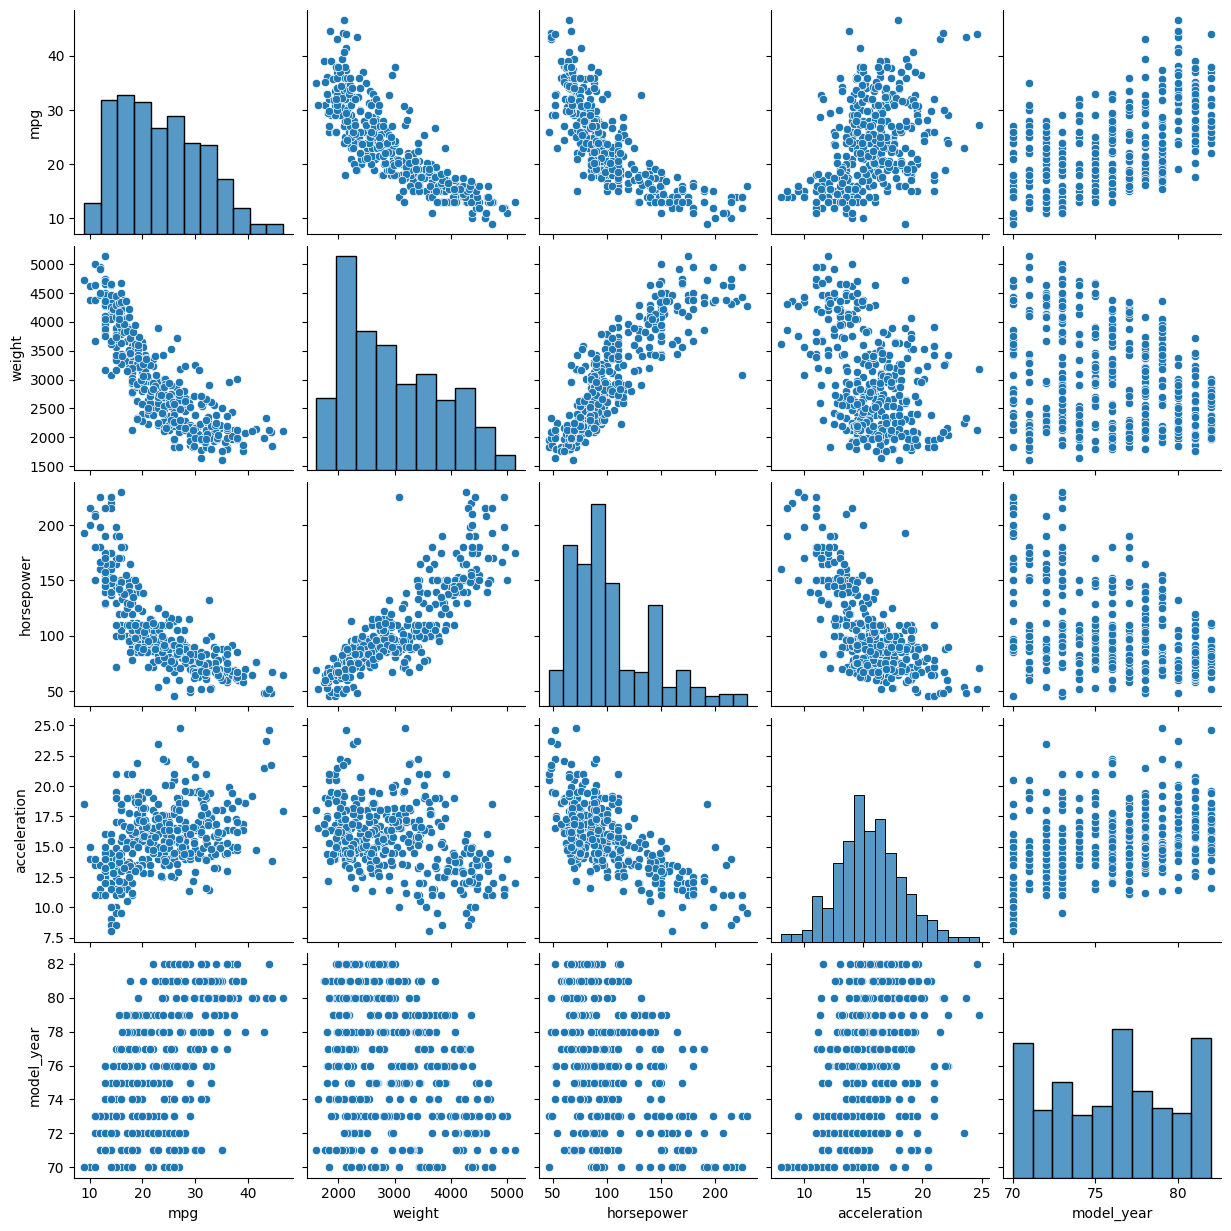

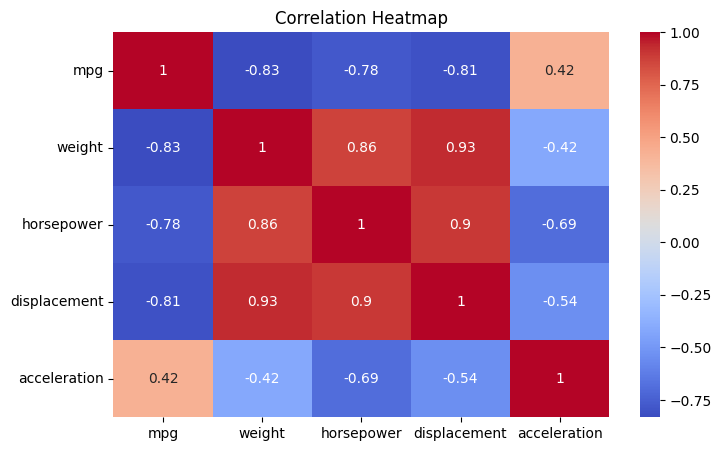

In [108]:
sns.pairplot(df[["mpg","weight","horsepower","acceleration","model_year"]])
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df[["mpg","weight","horsepower","displacement","acceleration"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Select Features & Target

Target = what we want to predict → mpg

In [109]:
X = df.drop(["mpg","name"], axis=1)   # input columns
y = df["mpg"]                         # output column

numeric_features = ["cylinders","displacement","horsepower","weight","acceleration","model_year"]
categorical_features = ["origin"]

###   Build Machine Learning Model

We use Random Forest, a strong and smart algorithm.

In [110]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])

model.fit(X_train, y_train)
print("Model Trained Successfully 🎉")


Model Trained Successfully 🎉


###  Model Evaluation

In [111]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance 📊")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

Model Performance 📊
MAE : 1.6714430379746805
RMSE: 2.38653415615218
R2 Score: 0.88841143817431


The model is very accurate and reliable.
Low error, high R² (≈0.89) → It predicts MPG quite well.

###  Predict New / Future Car Mileage

In [112]:
new_car = pd.DataFrame({
    "cylinders":[4],
    "displacement":[120],
    "horsepower":[85],
    "weight":[2300],
    "acceleration":[15],
    "model_year":[85],     
    "origin":["usa"]
})

future_prediction = model.predict(new_car)
print("Predicted MPG for Future Car:", future_prediction[0])


Predicted MPG for Future Car: 33.273499999999984


###   Fuel Efficiency Trend Over Time

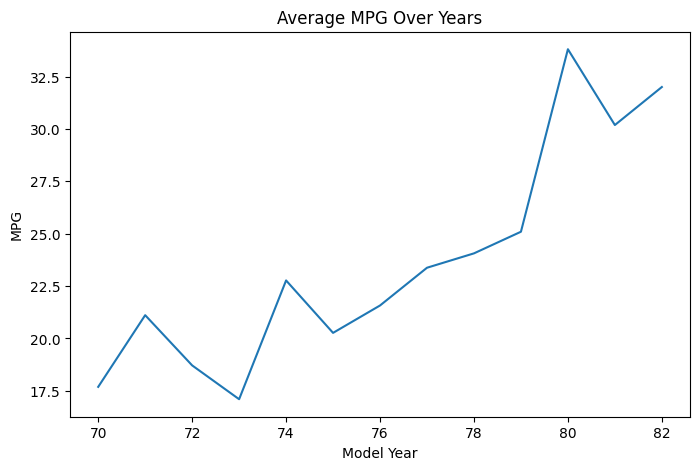

In [113]:
avg_mpg_year = df.groupby("model_year")["mpg"].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_mpg_year.index, avg_mpg_year.values)
plt.title("Average MPG Over Years")
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.show()


### Summary

Based on my analysis, the predicted MPG for the future car is 33.27, showing a promising step toward more fuel-efficient vehicles. My model is reliable, with a MAE of 1.67, RMSE of 2.39, and R² of 0.888, meaning it explains almost 89% of MPG variation and keeps errors low.

This prediction reflects the direction of the automotive industry: smarter, cleaner, and more efficient cars. With advances in lightweight materials, aerodynamics, and hybrid or electric technologies, I believe future vehicles will surpass this benchmark. For me, this number isn’t just a prediction—it’s a glimpse of the future of sustainable transportation.